In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy import signal

In [9]:
SEGUNDO_ECG = 148

In [10]:
def get_ecg(selected_ecg):
    df = pd.read_csv(ECGS[selected_ecg])
    df_head = df.head(SEGUNDO_ECG * 3)
    plt.figure(figsize = (20, 10))
    plt.subplot(211)
    plt.plot(range(len(df)), df)
    plt.title("Original Signal")
    plt.subplot(212)
    plt.plot(range(len(df_head)), df_head)
    plt.title("Filtered Signal B")
    plt.show()
    return df, df_head

def get_bpm(df):
    flat_values = [item for sublist in df.values for item in sublist]
    ecg_data = pd.Series(flat_values)

    # Detección de picos R en la señal de ECG.
    peaks, _ = signal.find_peaks(ecg_data, distance=(SEGUNDO_ECG * 0.6), height=2)
    distancias = np.diff(peaks)

    #print(peaks.size, end='\n')
    #print(distancias.size)

    media = np.mean(distancias)
    #print(type(media))

    # Calcular y mostrar los latidos por minuto (BPM).
    bpm = (ecg_data.size/media)/(ecg_data.size/(SEGUNDO_ECG * 60))

    print('Registrados {} latidos por minuto.'.format(round(bpm)))

    # Mostrar la gráfica de los picos R detectados.
    plt.figure(figsize = (20, 10))
    plt.plot(ecg_data, 'b')
    plt.plot(peaks, ecg_data[peaks], 'rx')
    plt.show()

def butter_pass(cutoff, fs, btype, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype = btype, analog = False)
    return b, a

def butter_pass_filter(data, cutoff, fs, type, order=5):
    b, a = butter_pass(cutoff, fs, order=order, btype=type)
    y = signal.filtfilt(b, a, data)
    return y

def noise_filter(df, low=False, high=False):
    filtered_df = [item for sublist in df.values for item in sublist]
    plt.figure(figsize = (20, 10))
    plt.subplot(211)
    plt.plot(range(len(df)), df)
    plt.title("Original Signal")
    if low:
        fps_low = 20
        filtered_df = butter_pass_filter(filtered_df, 3, fps_low, 'low')
    if high:
        fps_high = SEGUNDO_ECG
        filtered_df = butter_pass_filter(filtered_df, 10, fps_high, 'high')
    plt.subplot(212)
    plt.plot(range(len(filtered_df)), filtered_df)
    plt.title("Filtered Signal")
    plt.show()

In [11]:
ECGS = {
    0: 'señales/ECG_prueba_bonita.csv',
    1: 'señales/PruebaTS1.csv',
    2: 'señales/ECG-prueba2.csv',
    9: 'señales/ECG-prueba9.csv',
    10: 'señales/ECG-prueba10.csv',
    11: 'señales/ECG-prueba11.csv',
    12: 'señales/ECG-prueba12.csv',
    15: 'señales/ECG-prueba15.csv',
    100: 'señales/ECG-pruebasinusoidal.csv',
}

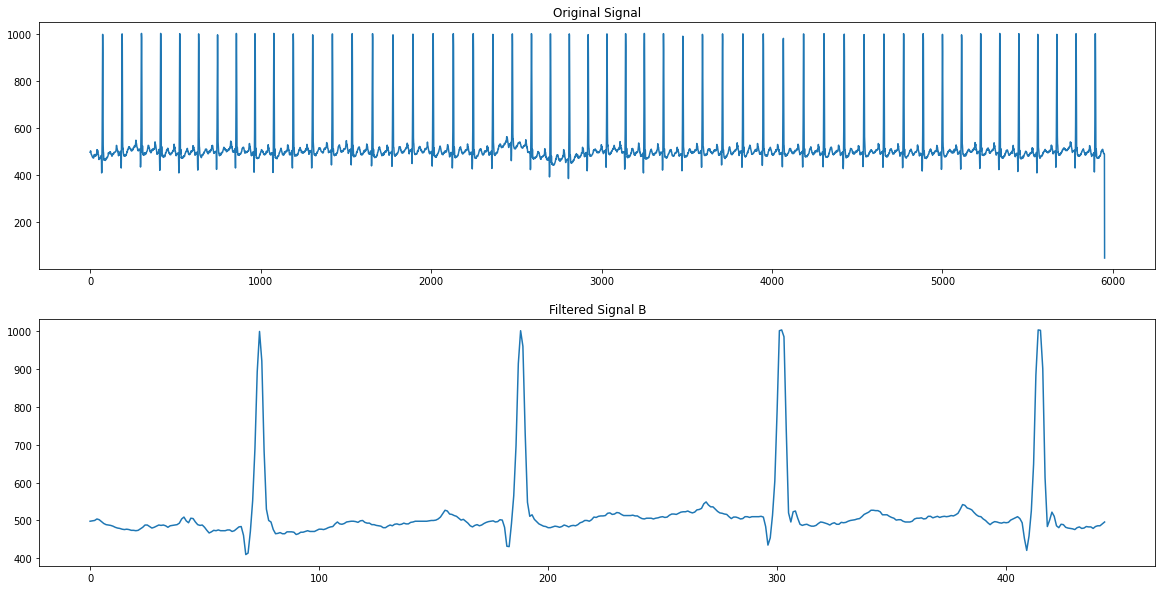

In [12]:
df, df_head = get_ecg(15)

Registrados 78 latidos por minuto.


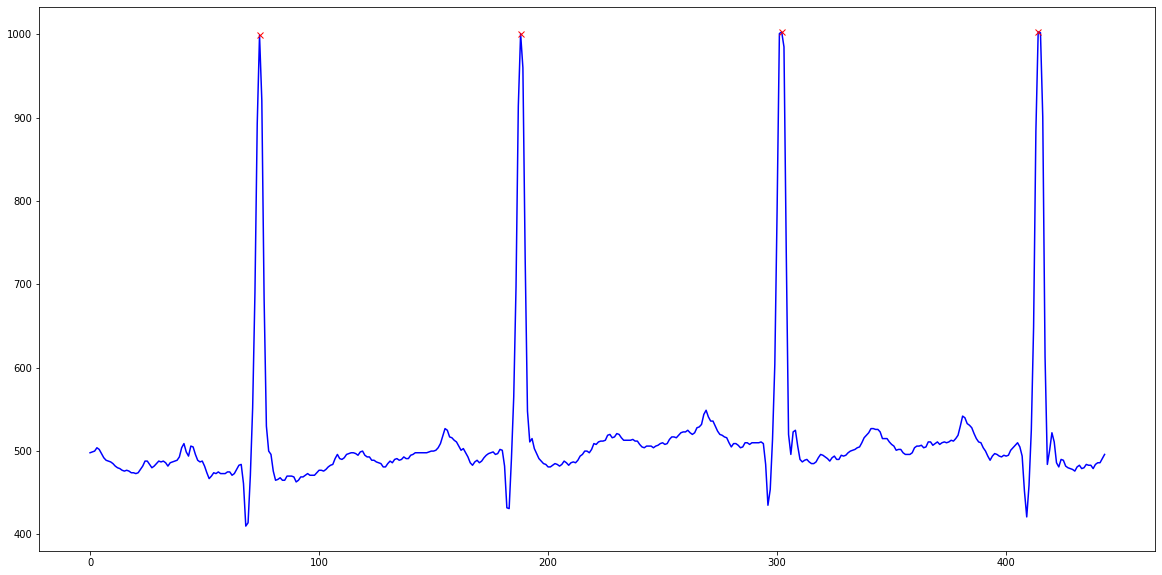

In [13]:
get_bpm(df_head)

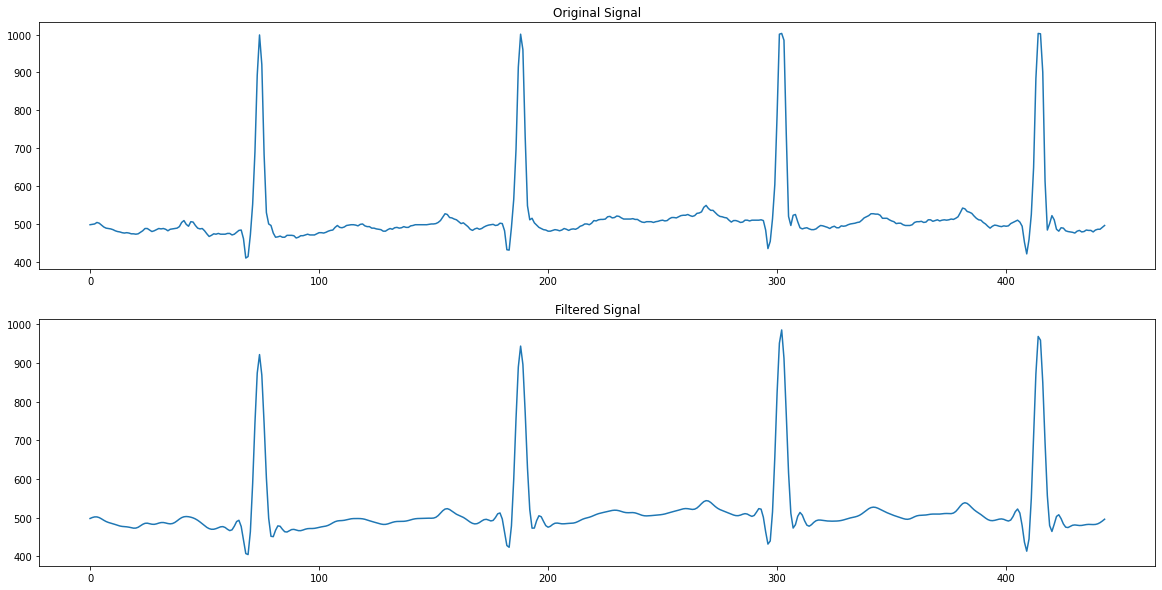

In [14]:
noise_filter(df_head, low=True)